<a href="https://colab.research.google.com/github/PhwTha00/buoi11_12_14/blob/main/buoi12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chọn 1 bộ dữ liệu time-series bất kì trong đây link text, và lấy ra một cột time-series, xây dựng mô hình dự đoán dùng AR, MA, ARMA và ARIMA models.

Với yêu cầu các models bên trên phải được tối ưu hóa tham số mô hình, các mô hình được so sánh dựa trên giá trị AIC. Model nào có giá trị AIC càng nhỏ thì càng tốt. Tối ưu tham số bằng cách duyệt những giá trị có thể dùng for.

Sau đó so sánh kêt quả của 4 models đã được tối ưu tham số từ 4 mô hình bên trên dựa vào giá trị RMSE của tập test.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.arima.model import ARIMAResultsWrapper
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import arma_order_select_ic
from sklearn.metrics import mean_squared_error


In [30]:
url = "https://github.com/thieu1995/csv-files/raw/main/data/timeseries/AirPassengers.csv"
air_passengers_data = pd.read_csv(url)
print(air_passengers_data)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


In [31]:
air_passengers_series = air_passengers_data['#Passengers']
print(air_passengers_series)

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64


In [32]:
train_data = air_passengers_series[:120]
test_data = air_passengers_series[120:]

In [33]:
best_rmse = float('inf')
best_model = None

In [41]:
# Mô hình AR
best_ar_order = None
for p in range(1, 11):
    ar_model = AutoReg(train_data, lags=p)
    ar_model_fit = ar_model.fit()
    ar_aic = ar_model_fit.aic
    if ar_aic < best_rmse:
        best_rmse = ar_aic
        best_model = ar_model_fit
        best_ar_order = p
print("Best AR Model:")
print(best_model.summary())

Best AR Model:
                            AutoReg Model Results                             
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                    AutoReg(10)   Log Likelihood                -490.417
Method:               Conditional MLE   S.D. of innovations             20.893
Date:                Thu, 07 Mar 2024   AIC                           1004.835
Time:                        16:14:25   BIC                           1037.241
Sample:                            10   HQIC                          1017.979
                                  120                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9806      6.293      1.109      0.267      -5.354      19.315
#Passengers.L1      1.0429      0.093     11.223      0.000       0.861       1.225
#Passengers.L2   

In [42]:
# Mô hình MA
best_ma_order = None
for q in range(1, 11):
    ma_model = ARIMA(train_data, order=(0, 0, q))
    ma_model_fit = ma_model.fit()
    ma_aic = ma_model_fit.aic
    if ma_aic < best_rmse:
        best_rmse = ma_aic
        best_model = ma_model_fit
        best_ma_order = q
print("Best MA Model:")
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWar

Best MA Model:
                            AutoReg Model Results                             
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                    AutoReg(10)   Log Likelihood                -490.417
Method:               Conditional MLE   S.D. of innovations             20.893
Date:                Thu, 07 Mar 2024   AIC                           1004.835
Time:                        16:14:55   BIC                           1037.241
Sample:                            10   HQIC                          1017.979
                                  120                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9806      6.293      1.109      0.267      -5.354      19.315
#Passengers.L1      1.0429      0.093     11.223      0.000       0.861       1.225
#Passengers.L2   

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
# Mô hình ARMA
best_arma_order = None
for p in range(1, 11):
    for q in range(1, 11):
        arma_model = ARIMA(train_data, order=(p, 0, q))
        try:
            arma_model_fit = arma_model.fit()
            arma_aic = arma_model_fit.aic
            if arma_aic < best_rmse:
                best_rmse = arma_aic
                best_model = arma_model_fit
                best_arma_order = (p, q)
        except:
            pass
print("Best ARMA Model:")
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

Best ARMA Model:
                            AutoReg Model Results                             
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                    AutoReg(10)   Log Likelihood                -490.417
Method:               Conditional MLE   S.D. of innovations             20.893
Date:                Thu, 07 Mar 2024   AIC                           1004.835
Time:                        16:17:30   BIC                           1037.241
Sample:                            10   HQIC                          1017.979
                                  120                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9806      6.293      1.109      0.267      -5.354      19.315
#Passengers.L1      1.0429      0.093     11.223      0.000       0.861       1.225
#Passengers.L2 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
# Mô hình ARIMA
best_arima_order = None
for p in range(1, 6):
    for d in range(1, 3):
        for q in range(1, 6):
            arima_model = ARIMA(train_data, order=(p, d, q))
            try:
                arima_model_fit = arima_model.fit()
                arima_aic = arima_model_fit.aic
                if arima_aic < best_rmse:
                    best_rmse = arima_aic
                    best_model = arima_model_fit
                    best_arima_order = (p, d, q)
            except:
                pass
print("Best ARIMA Model:")
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

Best ARIMA Model:
                            AutoReg Model Results                             
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                    AutoReg(10)   Log Likelihood                -490.417
Method:               Conditional MLE   S.D. of innovations             20.893
Date:                Thu, 07 Mar 2024   AIC                           1004.835
Time:                        16:17:55   BIC                           1037.241
Sample:                            10   HQIC                          1017.979
                                  120                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9806      6.293      1.109      0.267      -5.354      19.315
#Passengers.L1      1.0429      0.093     11.223      0.000       0.861       1.225
#Passengers.L2

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
predictions = best_model.forecast(steps=len(test_data))
rmse = np.sqrt(mean_squared_error(test_data, predictions))

print("Best AR Model Order:", best_ar_order)
print("Best MA Model Order:", best_ma_order)
print("Best ARMA Model Order:", best_arma_order)
print("Best ARIMA Model Order:", best_arima_order)
print("RMSE on Test Data:", rmse)

print("Best Model Summary:")
print(best_model.summary())

Best AR Model Order: None
Best MA Model Order: None
Best ARMA Model Order: None
Best ARIMA Model Order: None
RMSE on Test Data: 48.629715307344284
Best Model Summary:
                            AutoReg Model Results                             
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                    AutoReg(10)   Log Likelihood                -490.417
Method:               Conditional MLE   S.D. of innovations             20.893
Date:                Thu, 07 Mar 2024   AIC                           1004.835
Time:                        16:19:19   BIC                           1037.241
Sample:                            10   HQIC                          1017.979
                                  120                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.9806      6

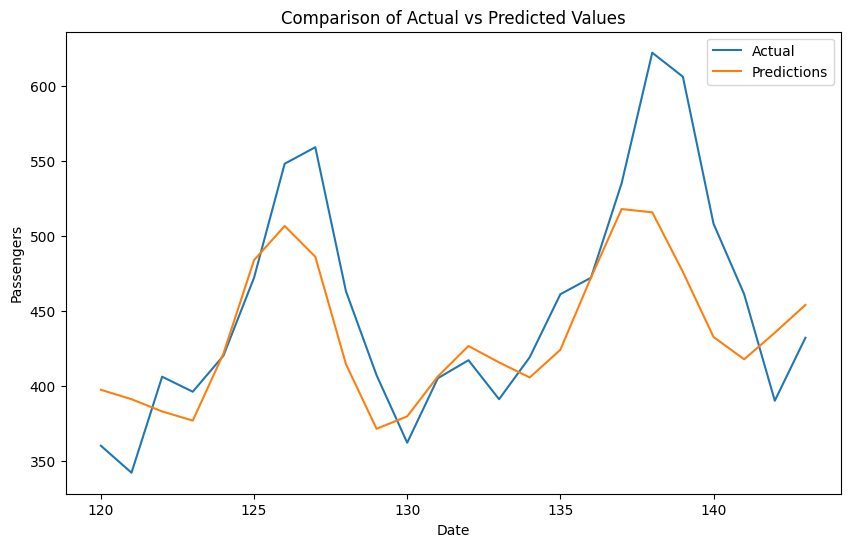

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predictions')
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()